In [27]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [32]:
dataset = pd.read_csv('matches.csv')
#dataset
#dataset = pd.Series[dataset]

    

In [5]:
dataset1 = pd.read_csv('deliveries.csv')

In [33]:
#dataset1

In [7]:
dictOfTeams = {'mi':'Mumbai Indians','csk':'Chennai Super Kings','rcb':'Royal Challengers Bangalore','srh':'Sunrisers Hyderabad','kings11':'Kings XI Punjab','kkr':'Kolkata Knight Riders','rr':'Rajasthan Royals','dc':'Delhi Daredevils'}
dictOfColors = {'mi':'blue','csk':'yellow','rcb':'red','srh':'orangered','kings11':'deeppink','kkr':'mediumblue','rr':'cornflowerblue','dc':'lightsteelblue'}

Enter team name mi
[7, 5, 11, 10, 10, 13, 7, 10, 7, 12, 6] [7, 8, 5, 6, 7, 6, 8, 6, 7, 5, 8] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[50.0, 38.46, 68.75, 62.5, 58.82, 68.42, 46.67, 62.5, 50.0, 70.59, 42.86]


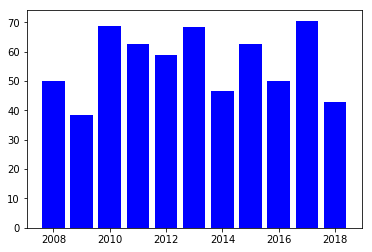

In [24]:
#check a team winning graph
def team_stats(t):
    team = dictOfTeams[t]
    if t in ['csk','rr']:
        wins = [0,0,0,0,0,0,0,0,2,2,0]
        losses,no_result = [0,0,0,0,0,0,0,0,1,1,0],[0,0,0,0,0,0,0,0,0,0,0]
    else:
        wins = [0,0,0,0,0,0,0,0,0,0,0]
        losses,no_result = [0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0]
    for i,j,k,l,m in zip(dataset['team1'],dataset['team2'],dataset['result'],dataset['winner'],dataset['season']):
        val = int(m)-2008
        if team in [i,j]:
            if k != 'no result':
                if l == team:
                    wins[val] += 1
                else:
                    losses[val] += 1
            else:
                no_result[val] += 1
    #print(wins,losses,no_result)
    for i in range(0,len(wins)):
        if (wins[i]==0 and losses[i]==0 and no_result[i]==0):
            wins[i] = -1
    print(wins,losses,no_result)
    win_percentage = [round(((i/(i+j+k))*100),2) for i,j,k in zip(wins,losses,no_result)]
    print(win_percentage)
    if t in ['csk','rr']:
        win_percentage[8:10] = [0,0]
        print(t," not played IPL in 2016 and 2017")
    years = [i for i in range(2008,2019)]
    plt.bar(years,win_percentage,color=dictOfColors[t])
team_name = str(input('Enter team name '))
team_stats(team_name)

Enter team 1 : csk
Enter team 2 : rcb


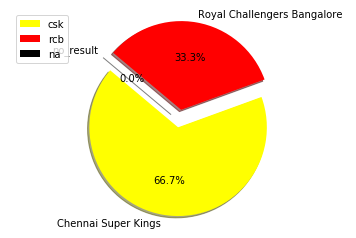

In [9]:
#function to compare two functions
def compare_two_teams(t1,t2):
    global dataset
    team1,team2 = dictOfTeams[t1],dictOfTeams[t2]
    wins1,wins2,no_result,total = 0,0,0,0
    for i,j,k,l in zip(dataset['team1'],dataset['team2'],dataset['winner'],dataset['result']):
        if team1 in [i,j] and team2 in [i,j]:
            if k==team1:
                wins1 += 1
            elif k==team2:
                wins2 += 1
            if l=='no result':
                no_result += 1
            total += 1
    #print(wins1,wins2,no_result,total)
    labels = [team1,team2,'no_result']
    sizes = [wins1,wins2,no_result]
    colors = [dictOfColors[t1],dictOfColors[t2],'black']
    explode = (0.1,0.1,0.1)
    plt.pie(sizes, explode = explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
    plt.legend([t1,t2,'na'],loc='upper left')
    plt.axis('equal')
    plt.show()
t1 = str(input('Enter team 1 : '))
t2 = str(input('Enter team 2 : '))
compare_two_teams(t1,t2)

In [10]:
########GET STATS OF A INDIVIDUAL PLAYER#########
#1.select a team
#2.view players list in the selected team
#3.select a player from the list
#4.view stats of selected player
#season id 7894-7953

In [30]:
teamName = str(input('Enter team Name : '))
listOfPlayers = []
for i,j,k in zip(dataset1['batting_team'],dataset1['match_id'],dataset1['batsman']):
    if i == dictOfTeams[teamName] and int(j) in range(7894,7954):
        if k not in listOfPlayers:
            listOfPlayers += [k]
print(listOfPlayers)
        

Enter team Name : rr
['AM Rahane', 'D Short', 'SV Samson', 'BA Stokes', 'RA Tripathi', 'JC Buttler', 'K Gowtham', 'S Gopal', 'DS Kulkarni', 'JD Unadkat', 'B Laughlin', 'H Klaasen', 'STR Binny', 'J Archer', 'M Lomror', 'P Chopra', 'I Sodhi', 'Anureet Singh']


In [26]:
#select a player...Player names are case sensitive
player = str(input('Enter player name : '))
runs,outs,balls_faced = 0,0,0
for i,j,k,l,m,n in zip(dataset1['batsman_runs'],dataset1['match_id'],dataset1['batsman'],dataset1['player_dismissed'],dataset1['wide_runs'],dataset1['is_super_over']):
    if l==player and int(n)==0:
            outs += 1
    if k==player and int(n)==0:
        runs += int(i)
        if int(m)==0:
            balls_faced += 1
print(player,"stats")
print("runs        :",runs)
print("balls faced :",balls_faced)
print("strike rate :",round(((runs/balls_faced)*100),2))
print("average     :",round((runs/outs),2))

Enter player name : AM Rahane
AM Rahane stats
runs        : 3445
balls faced : 2850
strike rate : 120.88
average     : 33.12


In [31]:
#Bowler vs Batsman
batsman = str(input('Enter batsman name : '))
bowler = str(input('Enter bowler name : '))
balls,runs,outs,f = 0,0,0,0
for i,j,k,l,m,n in zip(dataset1['batsman'],dataset1['bowler'],dataset1['batsman_runs'],dataset1['player_dismissed'],dataset1['dismissal_kind'],dataset1['wide_runs']):
    if i == batsman and j == bowler and int(n)==0:
        f = 1
        balls += 1
        runs += int(k)
        if l==batsman and m!='run out':
            outs += 1
if f==0:
    print('They did not face each other')
else:
    print("runs_scored : ",runs)
    print("balls_faced :",balls)
    print("dismissals  :",outs)

Enter batsman name : AM Rahane
Enter bowler name : DJ Bravo
runs_scored :  53
balls_faced : 26
dismissals  : 1
